## Data Analysis of Fridges from Jumia & Kilimall e-commerce website

### 1. Import libraries

In [242]:

import os
import numpy as np
import warnings
import psycopg2
import pandas as pd

from dotenv import load_dotenv
from sqlalchemy import create_engine, inspect

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ignore all warnings
warnings.filterwarnings('ignore')


### 2. Loading data

In [243]:
# Load environment variables
load_dotenv()

# PostgreSQL connection URL
db_url = f"postgresql+psycopg2://{os.getenv('DB_USER')}:{os.getenv('DB_PASS')}@" \
         f"{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"

# Create SQLAlchemy engine
engine = create_engine(db_url)

# Create an inspector to get table information
inspector = inspect(engine)

# reading fridges table into a df
fridges = pd.read_sql('SELECT * FROM public.fridges', engine)
fridges.head(3)


,id,name,brand,capacity_litres,doors,warranty_years,price,reviews,ratings,links,source,created_at
0,1,VON VART-19DHS Double Door Fridge 136L - Silve...,VON VART,None,NaN,1.0,27500.0,222,4.3,https://www.jumia.co.ke/von-vart-19dhs-double-...,Jumia,None
1,2,Hisense 94 Liters Single Door Fridge REF094DR ...,Hisense,None,NaN,2.0,16499.0,149,4.4,https://www.jumia.co.ke/hisense-94-liters-sing...,Jumia,None
2,3,Ramtons RF/257- 2 Door Direct Cool Fridge - 21...,Ramtons RF,None,2.0,1.0,33176.0,88,4.2,https://www.jumia.co.ke/ramtons-rf257-2-door-d...,Jumia,None


### 3. Data inspection

In [244]:
# shape of df
fridges.shape

(1649, 12)

- There are  1649 rows and 12 columns of data in our fridge dataset.

In [245]:
# first 5 rows of dataframe
fridges.head()

,id,name,brand,capacity_litres,doors,warranty_years,price,reviews,ratings,links,source,created_at
0,1,VON VART-19DHS Double Door Fridge 136L - Silve...,VON VART,None,NaN,1.0,27500.0,222,4.3,https://www.jumia.co.ke/von-vart-19dhs-double-...,Jumia,None
1,2,Hisense 94 Liters Single Door Fridge REF094DR ...,Hisense,None,NaN,2.0,16499.0,149,4.4,https://www.jumia.co.ke/hisense-94-liters-sing...,Jumia,None
2,3,Ramtons RF/257- 2 Door Direct Cool Fridge - 21...,Ramtons RF,None,2.0,1.0,33176.0,88,4.2,https://www.jumia.co.ke/ramtons-rf257-2-door-d...,Jumia,None
3,4,Nunix 138L Double Door Fridge Energy Efficient...,Nunix,None,NaN,1.0,27500.0,161,3.9,https://www.jumia.co.ke/nunix-138l-double-door...,Jumia,None
4,5,Roch RFR-120S-I Single Door Refrigerator - 90 ...,Roch RFR,90,NaN,NaN,15699.0,496,4.2,https://www.jumia.co.ke/roch-rfr-120s-i-single...,Jumia,None


In [246]:
# last 5 rows of dataframe
fridges.tail()

,id,name,brand,capacity_litres,doors,warranty_years,price,reviews,ratings,links,source,created_at
1644,571,Big Adjustable Washing Machine Fridge Mover S...,Unknown,,0.0,NaN,3200.0,0,NaN,https://www.kilimall.co.ke/listing/2821132-big...,Kilimall,None
1645,572,portable mini car fridge,Unknown,,0.0,NaN,5655.0,0,NaN,https://www.kilimall.co.ke/listing/1000337032-...,Kilimall,None
1646,573,Fk Electric Fridge Guard-Voltage Stabilizer Pl...,FK,,0.0,NaN,1200.0,0,NaN,https://www.kilimall.co.ke/listing/2761979-fk-...,Kilimall,None
1647,574,"Multipurpose Heavy Duty Stand for fridge, Wash...",Unknown,,0.0,NaN,3698.0,0,NaN,https://www.kilimall.co.ke/listing/1000148583-...,Kilimall,None
1648,575,ADJUSTABLE FRIDGE STAND WASING MACHINE MOVER ...,Unknown,,0.0,NaN,2400.0,0,NaN,https://www.kilimall.co.ke/listing/3077537-adj...,Kilimall,None


In [247]:
fridges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1649 non-null   int64  
 1   name             1649 non-null   object 
 2   brand            1649 non-null   object 
 3   capacity_litres  692 non-null    object 
 4   doors            750 non-null    float64
 5   warranty_years   812 non-null    float64
 6   price            1649 non-null   float64
 7   reviews          1649 non-null   int64  
 8   ratings          870 non-null    float64
 9   links            1649 non-null   object 
 10  source           1649 non-null   object 
 11  created_at       0 non-null      object 
dtypes: float64(4), int64(2), object(6)
memory usage: 154.7+ KB


- 'Created at' column has 0 non nulls, hence needs to be dropped
- Some columns have missing values, they include capacity_litres, doors, warranty_years and ratings

In [248]:
# check data types

fridges.dtypes

id                   int64
name                object
brand               object
capacity_litres     object
doors              float64
warranty_years     float64
price              float64
reviews              int64
ratings            float64
links               object
source              object
created_at          object
dtype: object

### 4. Data cleaning

In [249]:
# check for duplicates
fridges.duplicated().sum()

np.int64(0)

- The dataframe has zero duplicates

In [250]:
# identifying missing values
fridges.isnull().sum()

id                    0
name                  0
brand                 0
capacity_litres     957
doors               899
warranty_years      837
price                 0
reviews               0
ratings             779
links                 0
source                0
created_at         1649
dtype: int64

In [251]:
# droping created_at column
fridges = fridges.drop(columns='created_at')
fridges.head(2)

,id,name,brand,capacity_litres,doors,warranty_years,price,reviews,ratings,links,source
0,1,VON VART-19DHS Double Door Fridge 136L - Silve...,VON VART,None,NaN,1.0,27500.0,222,4.3,https://www.jumia.co.ke/von-vart-19dhs-double-...,Jumia
1,2,Hisense 94 Liters Single Door Fridge REF094DR ...,Hisense,None,NaN,2.0,16499.0,149,4.4,https://www.jumia.co.ke/hisense-94-liters-sing...,Jumia


In [252]:
# calculating % of missing values grouped by source
grouped_missing = fridges.groupby('source').apply(lambda x : x.drop(columns='source').isnull().mean() * 100)
print(grouped_missing)

          id  name  brand  capacity_litres  doors  warranty_years  price  \
source                                                                     
Jumia    0.0   0.0    0.0             89.2   83.8            24.3    0.0   
Kilimall 0.0   0.0    0.0              0.0    0.0           100.0    0.0   

          reviews  ratings  links  
source                             
Jumia         0.0     18.9    0.0  
Kilimall      0.0    100.0    0.0  


- Kilimall data does not contain values of 'warranty_years' and 'ratings'. Droping them woul mean losing a lot of data, so we'll impute the missing values using available methods.
- We'll also handle other missing values such as 'capacity_litres' and 'doors'.

In [253]:
# using average values to impute doors, warranty years and ratings

fridges['doors'].fillna(fridges['doors'].mean(), inplace=True)
fridges['warranty_years'].fillna(fridges['warranty_years'].mean(), inplace=True)
fridges['ratings'].fillna(fridges['ratings'].mean(), inplace=True)

fridges.isnull().sum()

id                   0
name                 0
brand                0
capacity_litres    957
doors                0
warranty_years       0
price                0
reviews              0
ratings              0
links                0
source               0
dtype: int64

In [254]:
# impute missing values in capacity_litres

# Get unique values from the 'capacity_litres' column
unique_values = fridges['capacity_litres'].unique()

# Display the unique values
print(unique_values)


[None '90' '213' '190' '128' '138.0' '94.0' '108.0' '90.0' '98.0' '213.0'
 '176.0' '118.0' '120.0' '128.0' '210.0' '125.0' '86.0' '' '154.0' '92.0'
 '150.0' '134.0' '168.0' '190.0' '180.0' '116.0' '430.0' '530.0' '288.0'
 '203.0' '247.0' '333.0' '115.0' '91.0' '158.0' '181.0' '202.0' '205.0'
 '93.0' '173.0' '255.0' '211.0' '197.0' '243.0' '183.0' '196.0' '236.0'
 '170.0' '348.0' '517.0' '463.0' '527.0' '454.0' '95.0' '287.0' '635.0'
 '519.0' '357.0' '442.0' '187.0' '217.0' '204.0' '378.0' '50.0' '198.0'
 '209.0' '188.0' '522.0' '136.0' '215.0' '200.0' '185.0' '85.0' '515.0'
 '275.0' '345.0' '137.0' '126.0' '314.0' '207.0' '595.0' '234.0' '649.0'
 '206.0' '415.0' '334.0' '248.0' '7.5' '350.0' '320.0' '220.0' '592.0'
 '251.0' '270.0' '46.0' '121.0' '588.0' '208.0']


- Checking for non numeric values in 'capacity_litres', convert to numeric so that we can calculate the correlation with other variables.

In [255]:
# Check for non-numeric values in 'capacity_litres' and convert them to NaN
fridges['capacity_litres'] = pd.to_numeric(fridges['capacity_litres'], errors='coerce')
numeric_columns = fridges.select_dtypes(include=['number'])

# check correlation matrix 
correlation_matrix = numeric_columns.corr()

# print correlation matrix
print(correlation_matrix)

                  id  capacity_litres  doors  warranty_years  price  reviews  \
id               1.0             -0.1   -0.0             0.0   -0.1      0.1   
capacity_litres -0.1              1.0    0.2            -0.0    0.9     -0.2   
doors           -0.0              0.2    1.0            -0.1    0.1      0.1   
warranty_years   0.0             -0.0   -0.1             1.0   -0.0      0.0   
price           -0.1              0.9    0.1            -0.0    1.0     -0.2   
reviews          0.1             -0.2    0.1             0.0   -0.2      1.0   
ratings          0.0              0.2    0.0             0.2    0.1      0.0   

                 ratings  
id                   0.0  
capacity_litres      0.2  
doors                0.0  
warranty_years       0.2  
price                0.1  
reviews              0.0  
ratings              1.0  


- Since 'price' is positively correlated with 'capacity_litres' at 0.89, we'll use price to impute missing values.

In [256]:
# imputing missing values in capacity litres
# Linear regression for imputation

# Step 1: Select features and target
feature = fridges[['price']]
target = fridges['capacity_litres']

# Step 2: Split data into known and missing capacity_litres
known_capacity = fridges[target.notna()]
missing_capacity = fridges[target.isna()]

# Step 3: Train a Linear Regression model
model = LinearRegression()
model.fit(known_capacity[['price']], known_capacity['capacity_litres']) # training the model with known values

# Step 4: Predict missing values
predicted_capacity = model.predict(missing_capacity[['price']])

# Step 5: # Ensure no negative predictions
predicted_capacity = np.maximum(predicted_capacity, 0)

# Step 6: Fill in the missing values
fridges.loc[fridges['capacity_litres'].isna(), 'capacity_litres'] = predicted_capacity

In [257]:
# verify imputation

print(fridges['capacity_litres'].isna().sum()) 


0


- missing values are successfully handled

In [258]:
# cleaning up brand names

fridges['brand'].unique()

array(['VON VART', 'Hisense', 'Ramtons RF', 'Nunix', 'Roch RFR',
       'VON VAMS', 'Vitron VDR', 'Smart Pro SFR',
       'Nunix Fridge Double Door', 'Haier HRD', 'Volsmart', 'Hisense RS',
       'Hisense REF', 'Haier', 'Mika MRDCD', 'Mika Fridge',
       'Hisense BLACK', 'Roch', 'Smartpro', 'Ecomax', 'Ramtons', 'Vitron',
       'GLD', 'Mika', 'Premier', 'Unknown', 'Von', 'Bruhm', 'Exzel',
       'Samsung', 'Ailyons', 'Syinix', 'LG', 'Solstar', 'Beko', 'Royal',
       'ICECOOL', 'Rebune', 'Legacy', 'FK'], dtype=object)

In [259]:
# cleaning the brand names 
fridges['brand'].replace({'VON VART': 'Von','VON VAMS':'Von', 'Hisense REF':'Hisense','Hisense RS':'Hisense', 'Hisense BLACK':'Hisense', 'Ramtons RF':'Ramtons', 'Nunix Fridge Double Door':'Nunix', 'Roch RFR':'Roch',
                           'Vitron VDR':'Vitron', 'Haier HRD':'Haier', 'Mika MRDCD':'Mika', 'Mika Fridge':'Mika', 'Smart Pro SFR':'SmartPro'}, inplace=True)
fridges['brand'].unique()

array(['Von', 'Hisense', 'Ramtons', 'Nunix', 'Roch', 'Vitron', 'SmartPro',
       'Haier', 'Volsmart', 'Mika', 'Smartpro', 'Ecomax', 'GLD',
       'Premier', 'Unknown', 'Bruhm', 'Exzel', 'Samsung', 'Ailyons',
       'Syinix', 'LG', 'Solstar', 'Beko', 'Royal', 'ICECOOL', 'Rebune',
       'Legacy', 'FK'], dtype=object)

In [260]:
# drop the id and links column 
fridges.drop(['id', 'links'], axis=1, inplace=True)
fridges.head()

,name,brand,capacity_litres,doors,warranty_years,price,reviews,ratings,source
0,VON VART-19DHS Double Door Fridge 136L - Silve...,Von,121.4,1.5,1.0,27500.0,222,4.3,Jumia
1,Hisense 94 Liters Single Door Fridge REF094DR ...,Hisense,92.8,1.5,2.0,16499.0,149,4.4,Jumia
2,Ramtons RF/257- 2 Door Direct Cool Fridge - 21...,Ramtons,136.2,2.0,1.0,33176.0,88,4.2,Jumia
3,Nunix 138L Double Door Fridge Energy Efficient...,Nunix,121.4,1.5,1.0,27500.0,161,3.9,Jumia
4,Roch RFR-120S-I Single Door Refrigerator - 90 ...,Roch,90.0,1.5,1.2,15699.0,496,4.2,Jumia


- Dropped 'id' and 'links' columns because we'll not need it in our analysis.

In [261]:
fridges.dtypes

name                object
brand               object
capacity_litres    float64
doors              float64
warranty_years     float64
price              float64
reviews              int64
ratings            float64
source              object
dtype: object

In [262]:
# convert capacity_litres dtype to integer
fridges['capacity_litres'] = fridges['capacity_litres'].astype('int')
print('capacity_litres: ', fridges['capacity_litres'].dtype)

# convert doors dtype to integer
fridges['doors'] = fridges['doors'].astype('int')
print('doors: ', fridges['doors'].dtype)

# convert warranty_years dtype to integer
fridges['warranty_years'] = fridges['warranty_years'].astype('int')
print('warranty_year: ', fridges['warranty_years'].dtype)

# convert price dtype to integer
fridges['price'] = fridges['price'].astype('int')
print('price: ', fridges['price'].dtype)

# convert reviews dtype to integer
fridges['reviews'] = fridges['reviews'].astype('int')
print('reviews: ', fridges['reviews'].dtype)

capacity_litres:  int64
doors:  int64
warranty_year:  int64
price:  int64
reviews:  int64


- Converting column dtypes to integers for better analysis

In [263]:
# setting floats to display one decimal point

# Set global float format to two decimal places
pd.options.display.float_format = "{:.1f}".format
fridges.head()



,name,brand,capacity_litres,doors,warranty_years,price,reviews,ratings,source
0,VON VART-19DHS Double Door Fridge 136L - Silve...,Von,121,1,1,27500,222,4.3,Jumia
1,Hisense 94 Liters Single Door Fridge REF094DR ...,Hisense,92,1,2,16499,149,4.4,Jumia
2,Ramtons RF/257- 2 Door Direct Cool Fridge - 21...,Ramtons,136,2,1,33176,88,4.2,Jumia
3,Nunix 138L Double Door Fridge Energy Efficient...,Nunix,121,1,1,27500,161,3.9,Jumia
4,Roch RFR-120S-I Single Door Refrigerator - 90 ...,Roch,90,1,1,15699,496,4.2,Jumia


- Setting ddefault display of float dtype to one decimal point.

In [264]:
fridges.dtypes

name                object
brand               object
capacity_litres      int64
doors                int64
warranty_years       int64
price                int64
reviews              int64
ratings            float64
source              object
dtype: object

### Data Analysis

In [265]:
fridges.describe()

,capacity_litres,doors,warranty_years,price,reviews,ratings
count,1649.0,1649.0,1649.0,1649.0,1649.0,1649.0
mean,139.7,1.2,1.1,34637.3,44.6,4.3
std,62.0,0.6,0.3,21560.1,80.8,0.2
min,7.0,0.0,1.0,917.0,0.0,3.3
25%,113.0,1.0,1.0,25299.0,0.0,4.3
50%,128.0,1.0,1.0,31199.0,5.0,4.3
75%,155.0,2.0,1.0,39400.0,59.0,4.3
max,649.0,4.0,2.0,389990.0,496.0,4.8


- From the statistical summary, 'capacity litres' and 'doors' have high disparity between minimum and maximum values indicating presence of outliers.

In [273]:
# separating categorical and numerical columns for analysis

cat_cols = fridges.select_dtypes(include=['object']).columns
num_cols = fridges.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:\n", cat_cols)

print("Numerical Variables:\n", num_cols)


Categorical Variables:
 Index(['name', 'brand', 'source'], dtype='object')
Numerical Variables:
 ['capacity_litres', 'doors', 'warranty_years', 'price', 'reviews', 'ratings']


capacity_litres
Skew: 3.62


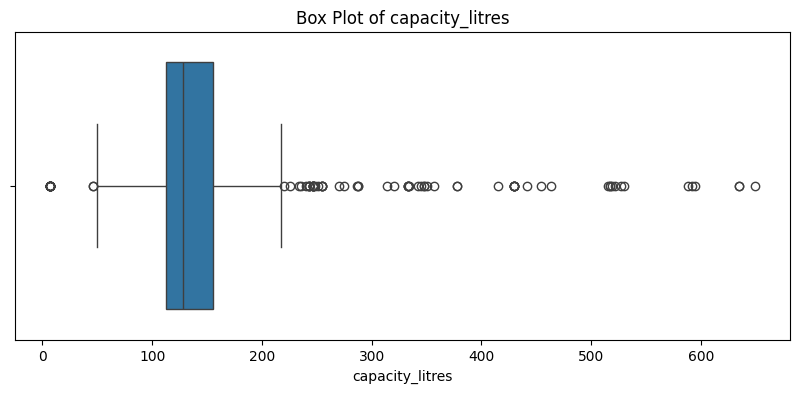

doors
Skew: 0.36


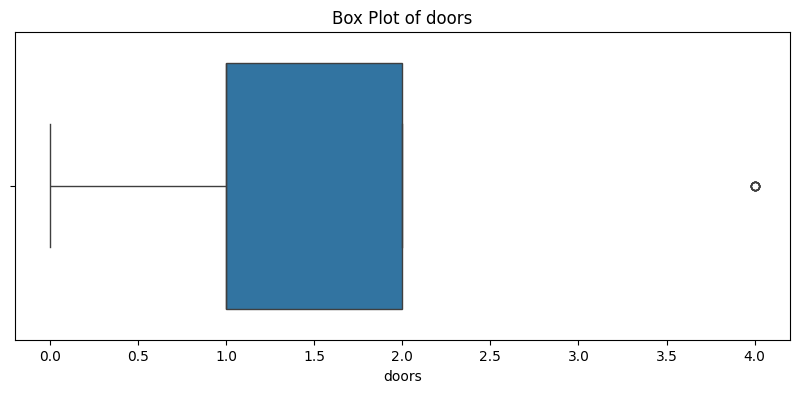

warranty_years
Skew: 2.3


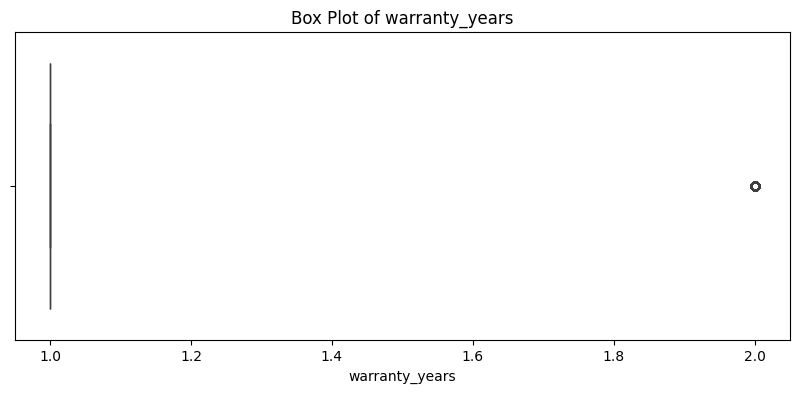

price
Skew: 7.1


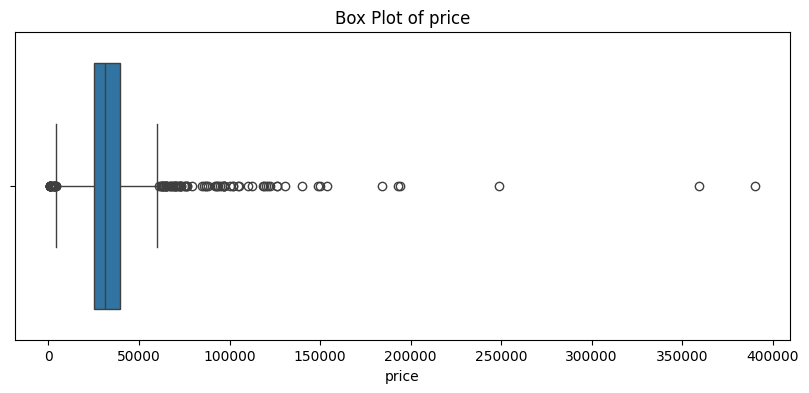

reviews
Skew: 3.51


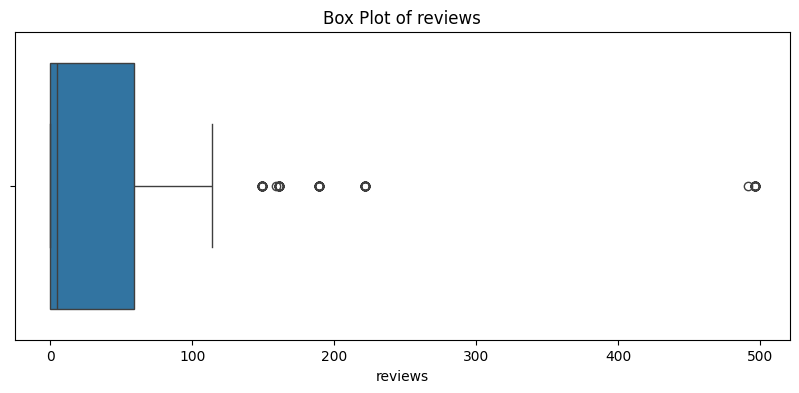

ratings
Skew: -1.93


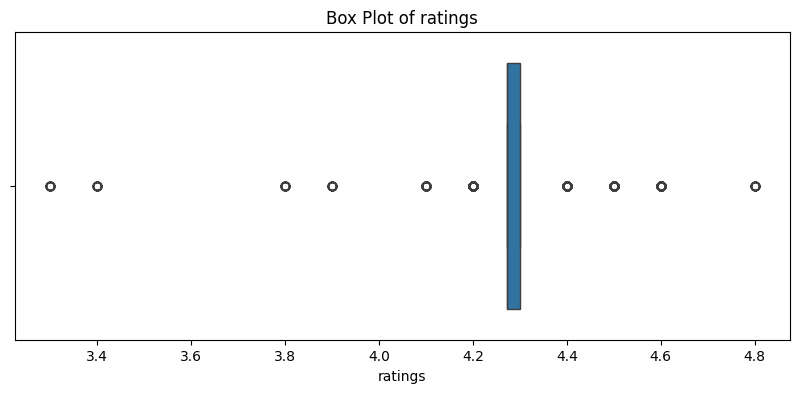

In [271]:
for col in num_cols:
    # Display the column name and skewness
    print(col)
    print('Skew:', round(fridges[col].skew(), 2))
    
    # Plotting the box plot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=fridges[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

- Capacity and price have high positive skewness with the box plots indicating majority of values are found in the lower end with few extreme values on the upper end that pull the mean to the right. In such data, median value is more relied upon compared to  mean value.
- The number of doors is distributed between 1 and 2, with a single outlier with 4 doors.
- Most warranty periods are defined as one year with few cases having 2 years.
- The number of customer reviews on a product are distributed between 0 - 500.
- Ratings is negatively skewed with a common value range between 4.2 - 4.4, also, outliers are evenly distributed.

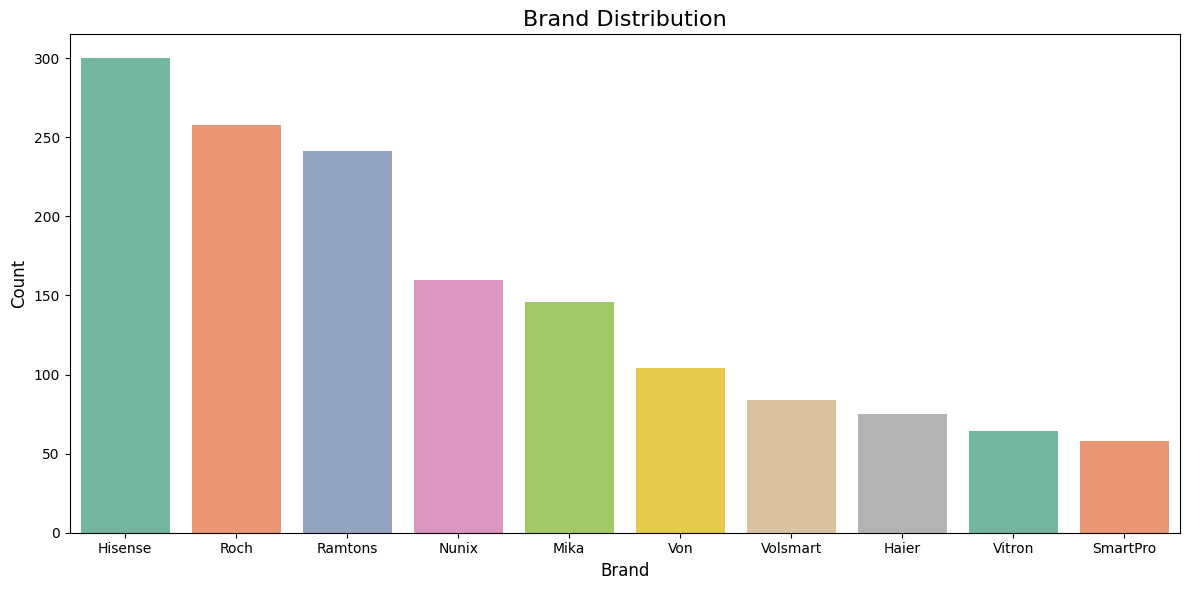

In [346]:
# brand  distribution using count plots

# Filter out 'Unknown' from the brand column
filtered_brands = fridges[fridges['brand'] != 'Unknown']

# Get the top 10 brands
top_10_brands = filtered_brands['brand'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.countplot(x='brand', data=filtered_brands, palette='Set2', order=top_10_brands.index)
plt.title('Brand Distribution', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Top brands with the highest products across both Jumia and Kilimall platforms include; Hisense, Roch and Ramtons.

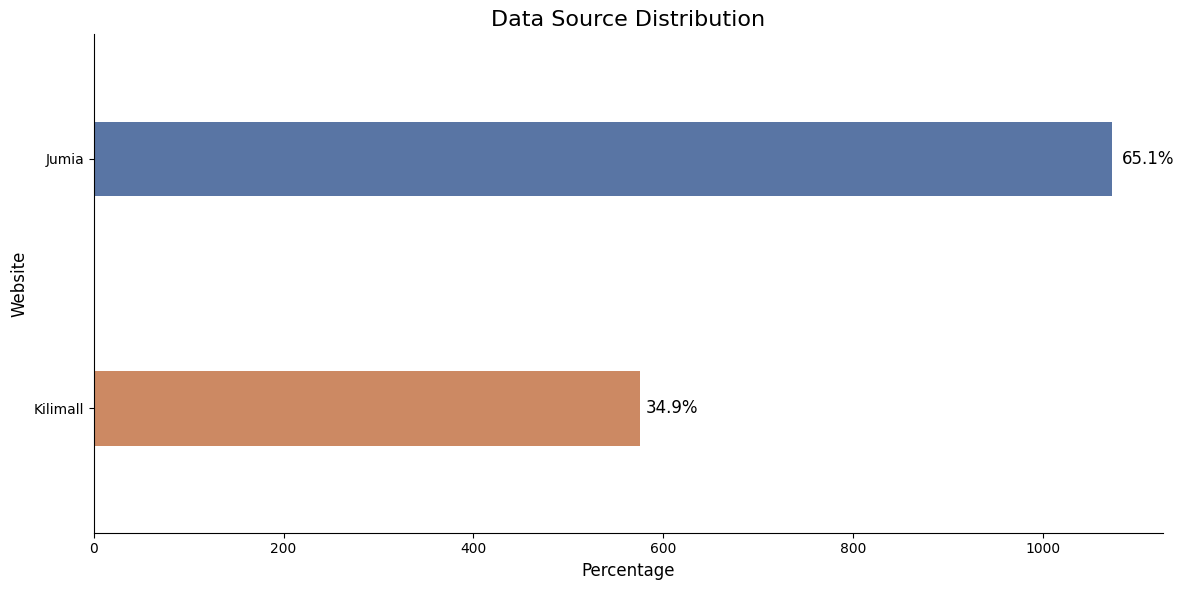

In [397]:
# Source distribution using a horizontal bar plot with percentage labels
plt.figure(figsize=(12, 6))

# Calculate the count of each source group
source_counts = fridges['source'].value_counts()
total = len(fridges)

# Create the count plot
ax = sns.countplot(y='source', data=fridges, hue='source', palette='deep', width=0.3)

# Add percentage values on top of the bars
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar
    percentage = (width / total) * 100  # Calculate percentage
    ax.text(width + 0.01 * width, p.get_y() + p.get_height() / 2, f'{percentage:.1f}%', 
            ha='left', va='center', fontsize=12)

# Remove the top and right spines (keep only x and y axis lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Title and labels
plt.title('Data Source Distribution', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Website', fontsize=12)
plt.tight_layout()
plt.show()

- Jumia has a higher number of fridges in the dataset compared to Kilimall.

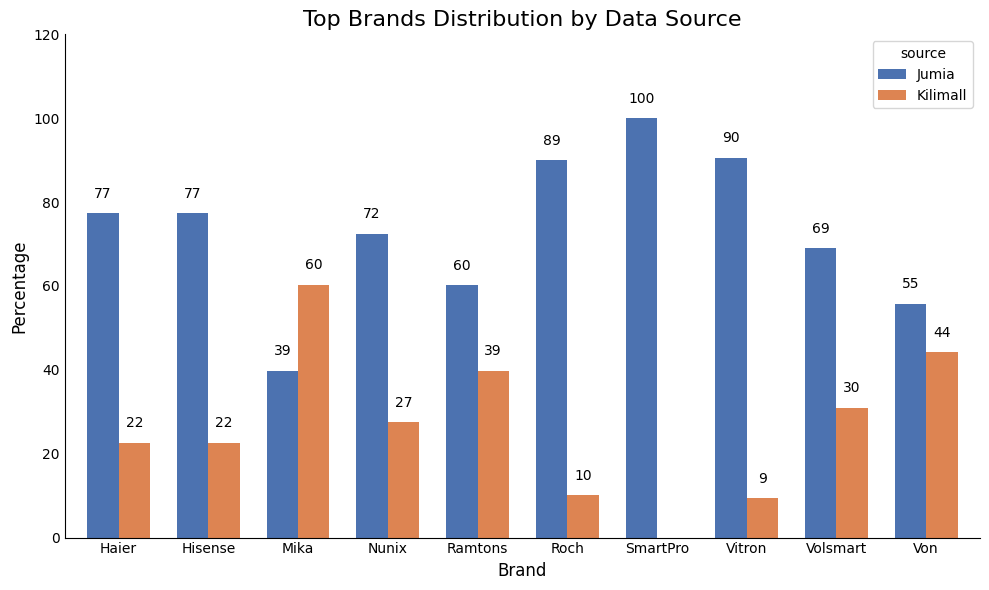

In [398]:
# Filter out 'Unknown' from the brand column
filtered_brands = fridges[fridges['brand'] != 'Unknown']

# Get the top 10 brands by count
top_10_brands = filtered_brands['brand'].value_counts().nlargest(10).index

# Filter the data for the top 10 brands
top_brands_data = filtered_brands[filtered_brands['brand'].isin(top_10_brands)]

# Calculate the count of each brand within each source
brand_source_counts = top_brands_data.groupby(['brand', 'source']).size().unstack(fill_value=0)

# Calculate the percentage for each source in the grouped data
brand_source_percentages = brand_source_counts.divide(brand_source_counts.sum(axis=1), axis=0) * 100

# Define colors based on Seaborn 'deep' palette
colors = sns.color_palette('deep', n_colors=len(brand_source_percentages.columns))

# Plot the clustered bar chart with adjusted bar width
ax = brand_source_percentages.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors, width=0.7)

# Remove the top and right spines (keep only x and y axis lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add titles and labels
plt.title('Top Brands Distribution by Data Source', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Brand', fontsize=12)

# Rotate the y-axis labels for better readability
plt.xticks(rotation=0)

# Adjust the y-axis limits for better scaling
plt.ylim(0, 120)  # Set y-axis scale from 0 to 100 to represent percentage

# Remove the grid and axis ticks
plt.grid(False)  # Turn off the grid
plt.tick_params(axis='both', which='both', length=0)  # Remove axis ticks

# Add percentage labels to each bar (as integers)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    xytext=(0, 9), textcoords='offset points', 
                    ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()





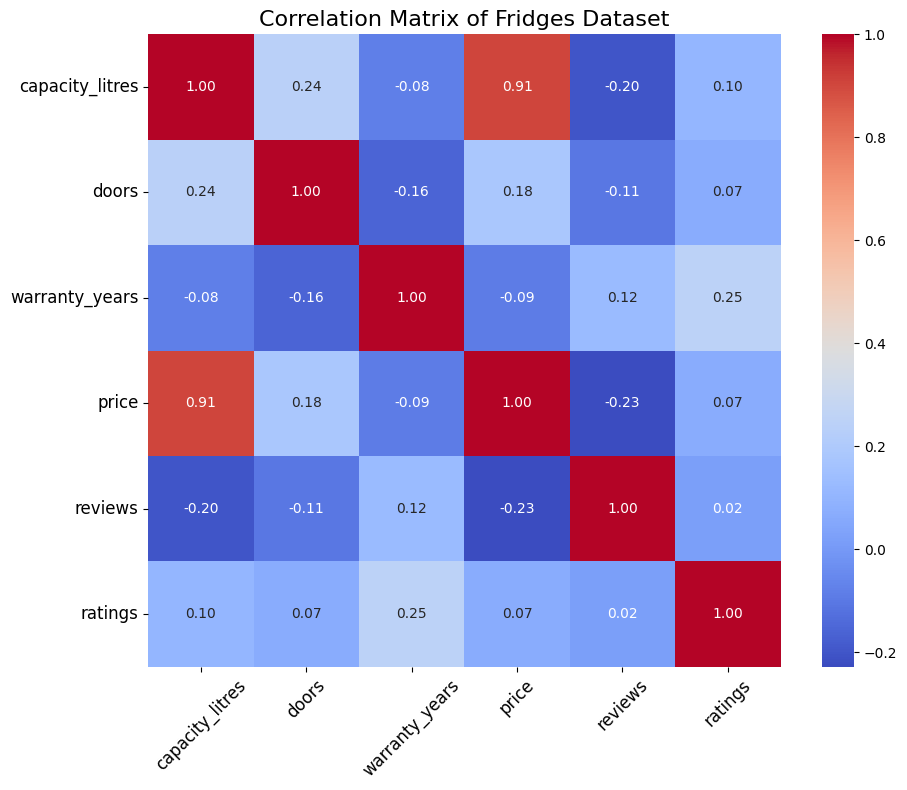

In [350]:
# Select only numeric columns
numeric_columns = fridges.select_dtypes(include=['number'])

# compute correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)

# Add title to the heatmap
plt.title('Correlation Matrix of Fridges Dataset', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

- There is a high corrrelation between fridge capacity and its price.

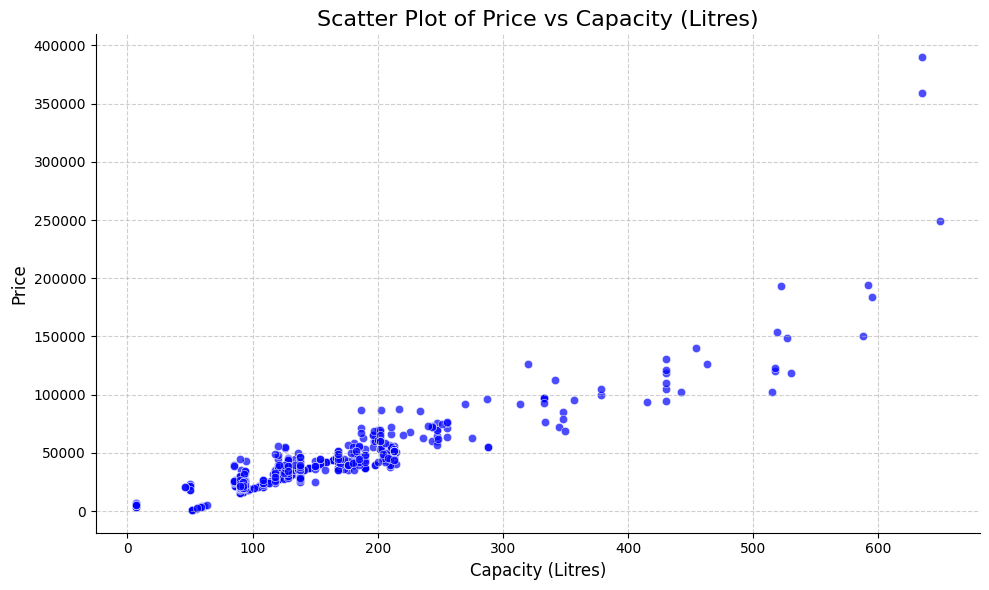

In [352]:
# scatter plot to further explore price and capacity of fridges

plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=fridges, x='capacity_litres', y='price', alpha=0.7, color='blue')

# Remove the top and right spines (keep only x and y axis lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add titles and labels
plt.title('Scatter Plot of Price vs Capacity (Litres)', fontsize=16)
plt.xlabel('Capacity (Litres)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

source
Jumia      30650.3
Kilimall   42064.4
Name: price, dtype: float64


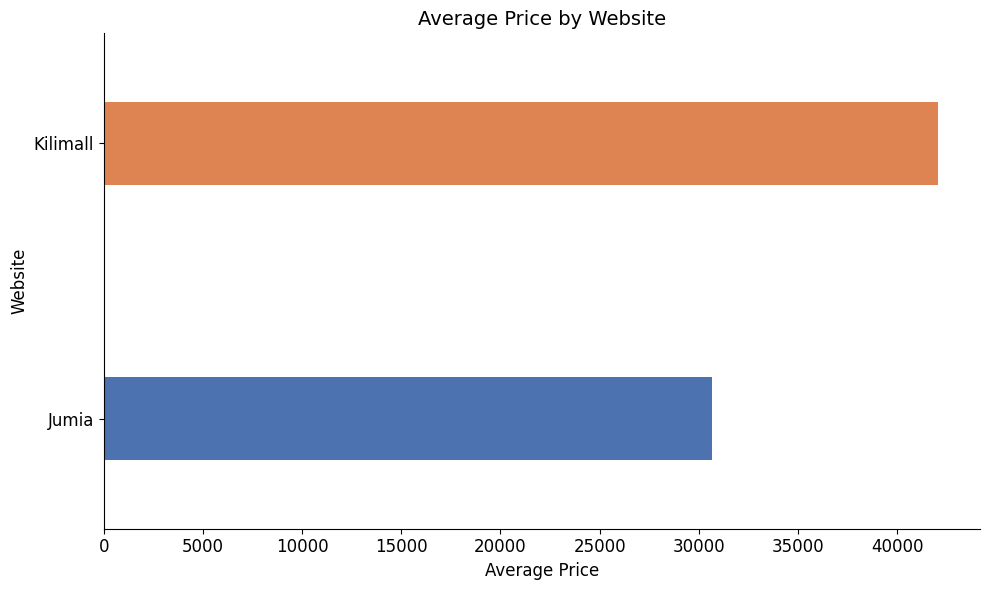

In [390]:
# Group by 'source' and calculate the mean of 'price'
average_price_by_source = fridges.groupby('source')['price'].mean()

# Print the mean values
print(average_price_by_source)

# Plot the results
plt.figure(figsize=(10, 6))

# Define colors based on Seaborn 'deep' palette
colors = sns.color_palette('deep', n_colors=len(brand_source_percentages.columns))

ax = average_price_by_source.plot.barh(color=colors, fontsize=12, width=0.3)

# Remove top and right spines (keep only bottom and left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add titles and labels
plt.title('Average Price by Website', fontsize=14)
plt.ylabel('Website', fontsize=12)
plt.xlabel('Average Price', fontsize=12)


# Adjust layout
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


- Kilimall has a higher mean price compared to Jumia. However, the price column exhibits a high positive skew, which may limit its effectiveness as a reliable metric for evaluating the data.

source
Jumia      29993.0
Kilimall   36598.0
Name: price, dtype: float64


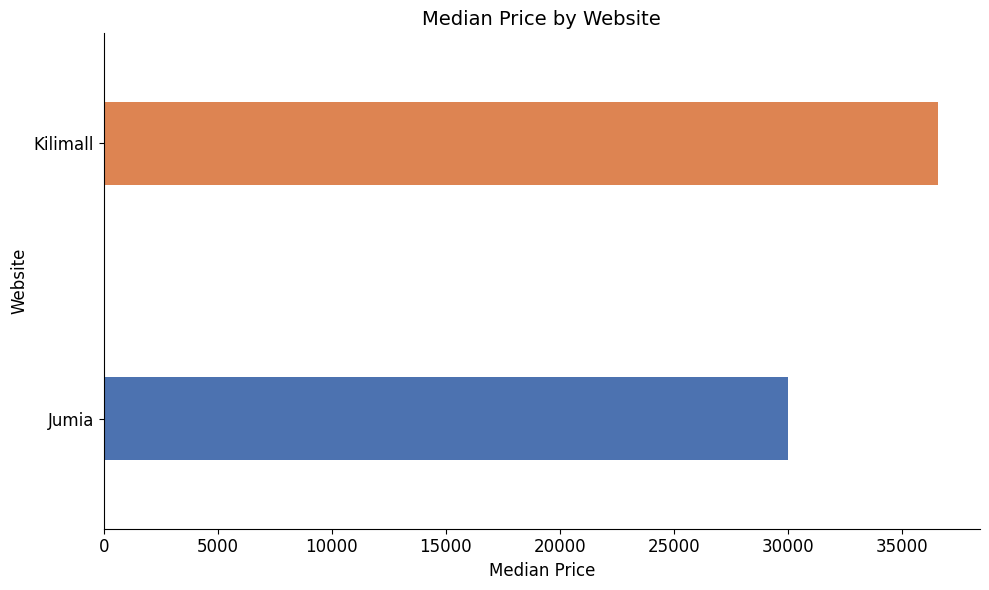

In [392]:
# Group by 'source' and calculate the median of 'price'
average_price_by_source = fridges.groupby('source')['price'].median()

# Print the mean values
print(average_price_by_source)

# Plot the results
plt.figure(figsize=(10, 6))

# Define colors based on Seaborn 'deep' palette
colors = sns.color_palette('deep', n_colors=len(brand_source_percentages.columns))

ax = average_price_by_source.plot.barh(color=colors, fontsize=12, width=0.3)

# Remove top and right spines (keep only bottom and left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add titles and labels
plt.title('Median Price by Website', fontsize=14)
plt.ylabel('Website', fontsize=12)
plt.xlabel('Median Price', fontsize=12)

# Adjust layout
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Kilimall has a higher median price than Jumia, suggesting that fridges on Kilimall tend to be more expensive on average compared to those on Jumia

brand
Haier      40595.0
Von        39999.0
Mika       38499.5
Ramtons    38000.0
Vitron     30149.5
Nunix      29993.0
SmartPro   27999.0
Roch       27949.5
Hisense    25999.0
Volsmart   25299.0
Name: price, dtype: float64


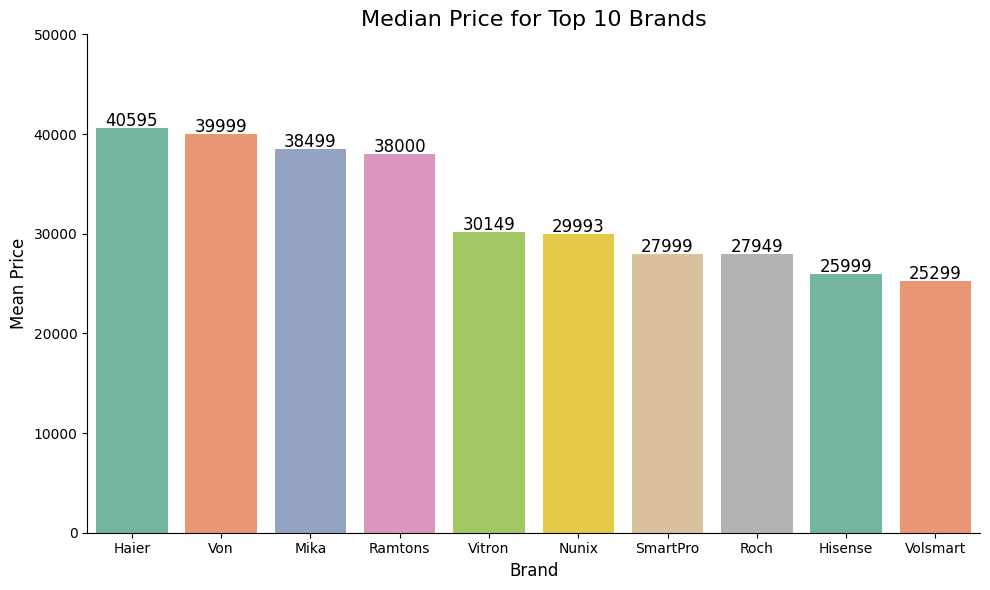

In [381]:
# Filter out the top 10 brands (excluding 'Unknown')
top_10_brands = fridges[fridges['brand'] != 'Unknown']['brand'].value_counts().nlargest(10).index

# Group by brand and calculate the mean price for each brand
median_prices = fridges[fridges['brand'].isin(top_10_brands)].groupby('brand')['price'].median().sort_values(ascending=False)

print(median_prices)

# Define colors based on Seaborn 'Set2' palette
colors = sns.color_palette('Set2', n_colors=len(top_10_brands))

# Plot the bar chart for the top 10 brands
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=median_prices.index, y=median_prices.values, palette=colors)

# Remove top and right spines (keep only bottom and left)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add median values on top of each bar
for i, value in enumerate(median_prices.values):
    ax.text(i, value + 200, f'{int(value)}', ha='center', fontsize=12)

# set y-axis limit
plt.ylim(0,50000)

# Set plot title and labels
plt.title('Median Price for Top 10 Brands', fontsize=16)
plt.ylabel('Mean Price', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Haier, Von and Mika had the highest median prices.

Sum of Reviews per Top 10 Brands:
brand
Roch        26888
Hisense     15052
Ramtons      9030
Von          8679
Nunix        7622
Vitron       4828
Haier         644
Volsmart      445
SmartPro      261
Mika           60
Name: reviews, dtype: int64


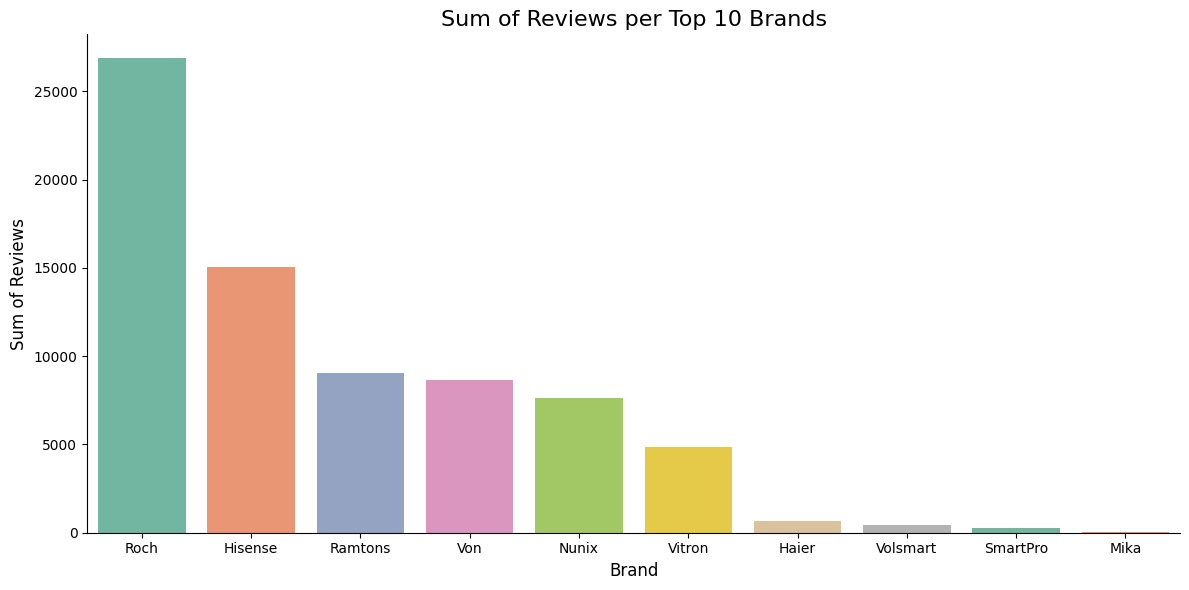

In [393]:
# Filter out the top 10 brands (excluding 'Unknown')
top_10_brands = fridges['brand'].value_counts().nlargest(10).index

# Group by brand and sum the reviews (assuming 'review_count' column for number of reviews)
reviews_per_brand = fridges[fridges['brand'].isin(top_10_brands)].groupby('brand')['reviews'].sum().sort_values(ascending=False)

# Display the sum of reviews per top 10 brand
print("Sum of Reviews per Top 10 Brands:")
print(reviews_per_brand)

# Visualize the sum of reviews per top 10 brands
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=reviews_per_brand.index, y=reviews_per_brand.values, palette='Set2')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add title and labels
plt.title('Sum of Reviews per Top 10 Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Sum of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

Top Brands by Total Ratings:
brand
SmartPro   4.4
Haier      4.4
Vitron     4.4
Hisense    4.4
Ramtons    4.3
Roch       4.3
Von        4.3
FK         4.3
Ecomax     4.3
Bruhm      4.3
Name: ratings, dtype: float64


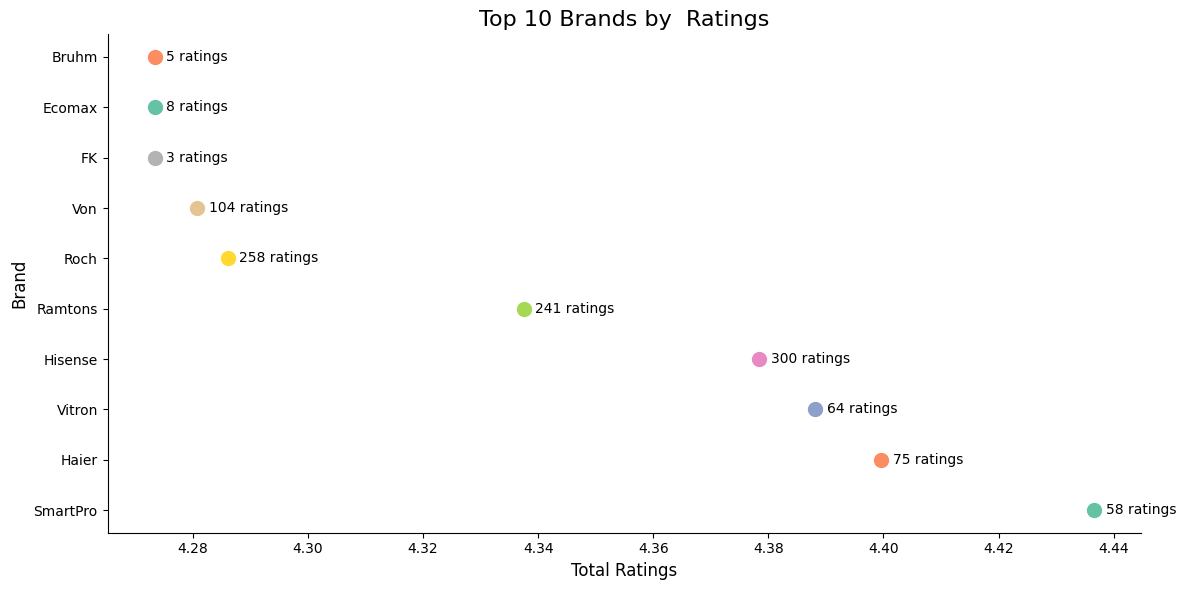

In [366]:
# group by brand and sum ratings
brand_ratings = fridges.groupby('brand')['ratings'].mean().sort_values(ascending=False)

# Display the top brands with the most ratings
print("Top Brands by Total Ratings:")
print(brand_ratings.head(10))

# Visualize the top 10 brands with the most ratings
top_brands = brand_ratings.head(10)

# extract ratings count
ratings_count = fridges.groupby('brand')['ratings'].count().loc[top_brands.index]

# Create a color palette from Seaborn
colors = sns.color_palette("Set2", len(top_brands))

# Create a scatter plot with different colors for each point
plt.figure(figsize=(12, 6))
for i, (rating, brand) in enumerate(zip(top_brands.values, top_brands.index)):
    plt.scatter(rating, brand, color=colors[i], s=100)

    # Annotate the point with the ratings count
    plt.text(rating + 0.002, brand, f'{ratings_count[brand]} ratings', fontsize=10, verticalalignment='center')

# Remove the top and right spines
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add title and labels
plt.title('Top 10 Brands by  Ratings', fontsize=16)
plt.xlabel('Total Ratings', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

- SmartPro, Haier, and Vitron have the highest average rating, however brands that received more counts of ratings were Hisense, Roch and Ramtons

Sum of Reviews per Source:
source
Jumia       72065
Kilimall     1497
Name: reviews, dtype: int64


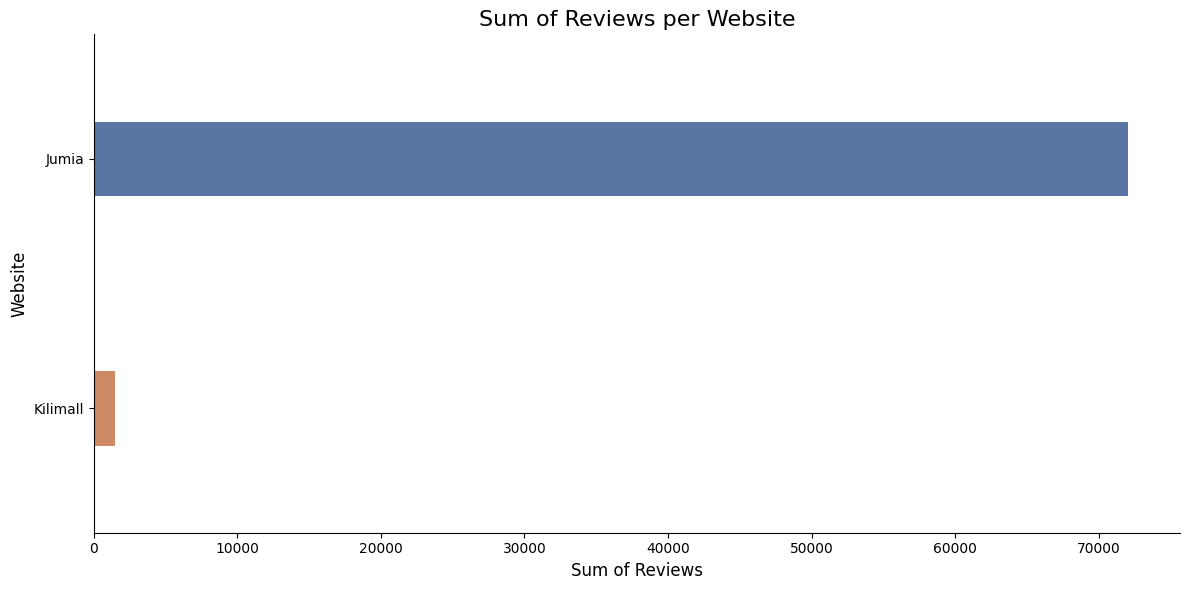

In [395]:
# Sum of reviews per source
reviews_per_source = fridges.groupby('source')['reviews'].sum()

# Display the sum of reviews per source
print("Sum of Reviews per Source:")
print(reviews_per_source)

# Visualize the sum of reviews per source
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=reviews_per_source.values, y=reviews_per_source.index, palette='deep', width=0.3)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add title and labels
plt.title('Sum of Reviews per Website', fontsize=16)
plt.xlabel('Sum of Reviews', fontsize=12)
plt.ylabel('Website', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


- Jumia has more product ratings, which may indicate more customer traffic and engagement.

Number of Ratings per Source:
source
Jumia       72065
Kilimall     1497
Name: reviews, dtype: int64


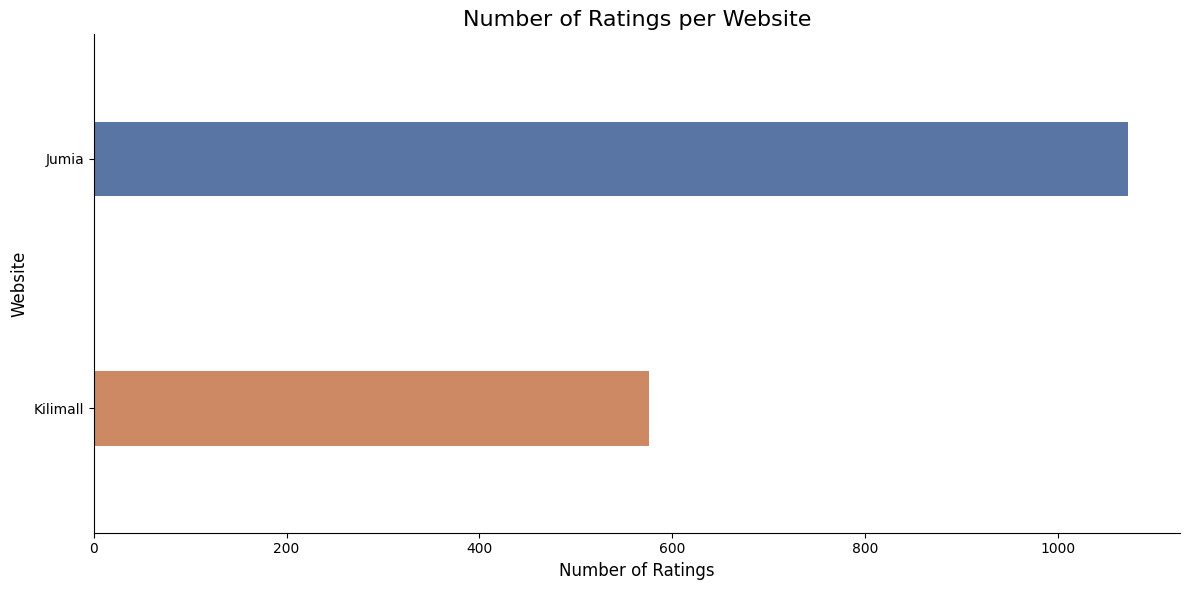

In [396]:
# Number of ratings per source
ratings_per_source = fridges.groupby('source')['ratings'].count()

# Display the sum of reviews per source
print("Number of Ratings per Source:")
print(reviews_per_source)

# Visualize the sum of reviews per source
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=ratings_per_source.values, y=ratings_per_source.index, palette='deep', width=0.3)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add title and labels
plt.title('Number of Ratings per Website', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Website', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()

# Show t

- Jumia has more customer reviews, which may indicate more customer traffic and engagement